## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
# Graph display

%matplotlib inline

In [3]:
# Define filepath

file_path = '/Users/daphne/Downloads/DY_6.1/Prepared Data/DY_Chocolate_Ratings_clean1.xlsx'

In [4]:
# Import file

df = pd.read_excel(file_path)

In [5]:
df.head(10)

,Company \n(Maker-if known),Specific Bean Origin,Reference #,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


## Preparing for analysis

In [6]:
# Removing % from 'Cocoa Percent' so it can be treated at numeric

df['Cocoa Percent'] = df['Cocoa Percent'].str.rstrip('%').astype('float')

In [7]:
# Excluding non-numeric columns

selected_columns = ['Cocoa Percent', 'Rating']
df_selected = df[selected_columns]

In [8]:
# Normalize numeric columns using StandardScaler

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_selected)

## Elbow technique

In [9]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
score = [kmeans[i].fit(df_normalized).score(df_normalized) for i in range(len(kmeans))]

score

/Users/daphne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/daphne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/daphne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/daphne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/daphne/an

[-3589.9999999999927,
 -2355.480817184108,
 -1623.0017356397566,
 -1276.3346216556333,
 -1072.485597682772,
 -875.2583435656061,
 -786.3382500132151,
 -709.3295691803993,
 -632.91884138371]

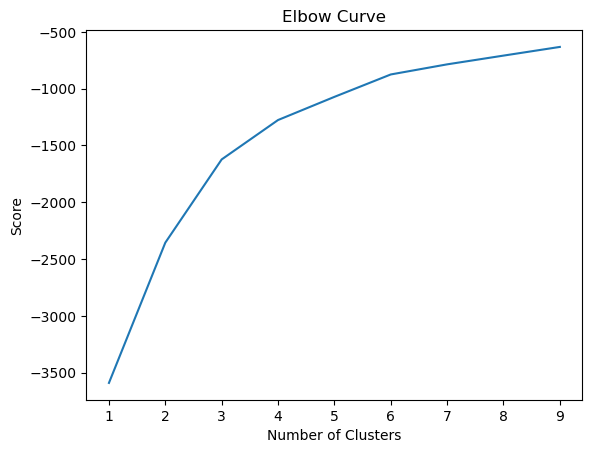

In [11]:
# Plot the elbow 

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Number of clusters

I have chosen 3 because this seems to be the point where the rate of decrease is slowing down the most. 

## K-means algorithm

In [12]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3) 

In [13]:
#Fit the k-means object to the dataframe

kmeans.fit(df_normalized)

kmeans

/Users/daphne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

## Create 'clusters' column

In [14]:
# Assign clusters

df['clusters'] = kmeans.fit_predict(df_normalized)

/Users/daphne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df.head(10)

,Company \n(Maker-if known),Specific Bean Origin,Reference #,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,clusters
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,1
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,0
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo,0
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo,1
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru,1
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela,0
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,,Cuba,1
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela,1
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela,1
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,,Peru,1


In [20]:
df['clusters'].value_counts()

1    954
0    668
2    173
Name: clusters, dtype: int64

## Visualizations using clusters

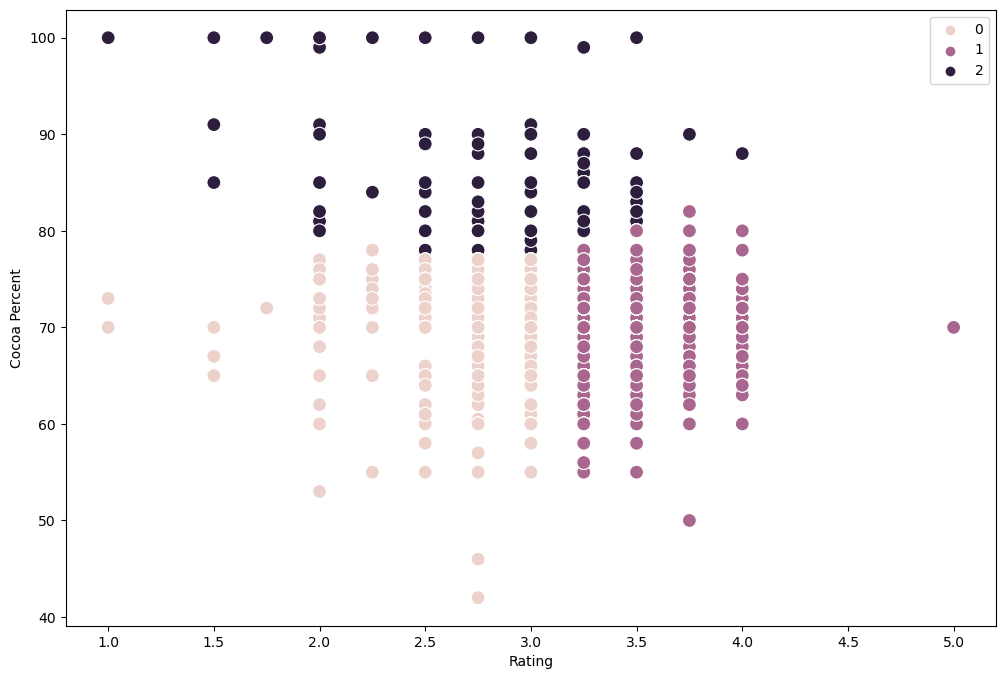

In [21]:
# Plot the clusters for the "Rating" and "Cocoa Percent"
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Rating'], y=df['Cocoa Percent'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Rating') 
plt.ylabel('Cocoa Percent') 
plt.show()

In [23]:
df.groupby('clusters').agg({'Rating':['mean', 'median'], 'Cocoa Percent':['mean', 'median']})

Rating        Cocoa Percent       
              mean median          mean median
clusters                                      
0         2.771332   2.75     70.037425   70.0
1         3.537474   3.50     70.431342   70.0
2         2.848266   3.00     85.098266   83.0